## Holt's Method

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [63]:
df = pd.read_excel('DATA FILE 334 (2).xlsx')
df.columns

Index([             'Part ID',    'Planning Leadtime',         'Order Policy',
                'Order Point',     'Safety Stock Qty',      'Fixed Order Qty',
             'Days Of Supply',    'Minimum Order Qty',    'Maximum Order Qty',
         'Multiple Order Qty',                  'Fab',                  'Pur',
                    'Stocked',          'Detail Only',              'Purc Lt',
                   'Abc Code',     'Inventory Locked',           'Inventory$',
         'Unit Material Cost',     'Annual Usage Qty',        'Prev Yr Usage',
             'Roll Ann Usage',          'Qty On Hand',    'Qty Available Mrp',
                   'TotAlloc',           'Coeff_Code',             'Stock Um',
           'Def Orig Country',       'Primary Whs Id',       'Primary Loc Id',
         'Annual Usage Value',       2666342.46838269,             'Profit %',
       'Cummulatove Profit %',           'Jan (2018)',           'Feb (2018)',
                 'Mar (2018)',           'Apr (2018)

### Accuracy in Forecasting

In [53]:
start_index_2018 = df.columns.get_loc("Jan (2018)")
end_index_2018 = df.columns.get_loc("Dec (2018)")
start_index_2019 = df.columns.get_loc("Jan (2019)")
end_index_2019 = df.columns.get_loc("Dec (2019)")

Rolling forecast is a dynamic approach that updates the forecast as new data becomes available. This method is more responsive to changes in the data and can be more accurate than a forecast made at one point in time.

/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kiranjitnagra/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a su

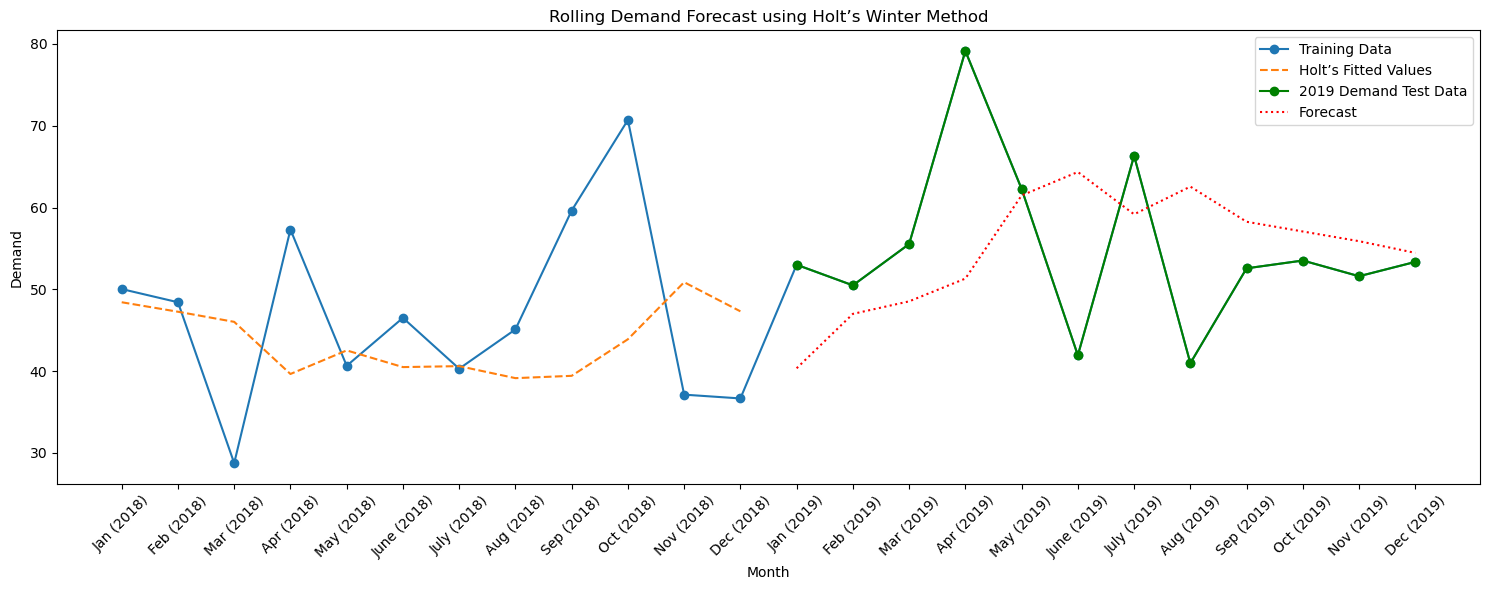

In [56]:
train_data = df.iloc[:, start_index_2018:end_index_2018+1].mean(axis=0)
test_data = df.iloc[:, start_index_2019:end_index_2019+1].mean(axis=0)

# Fit the model on the training data
model = ExponentialSmoothing(train_data, trend='add', seasonal=None, initialization_method="legacy-heuristic")
fitted_model = model.fit()

# Create an empty series to store rolling forecasts
rolling_forecasts = pd.Series()

# Perform rolling forecasting
for period, actual_value in test_data.items():
    # Forecast the next step
    next_forecast = fitted_model.forecast(steps=1).iloc[0]
    rolling_forecasts.at[period] = next_forecast
    
    # Update the training data with the new actual value
    train_data.at[period] = actual_value
    model = ExponentialSmoothing(train_data, trend='add', seasonal=None, initialization_method="legacy-heuristic")
    fitted_model = model.fit()

# Plot the training data, fitted model, and rolling forecasts
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data, label='Training Data', marker='o')
plt.plot(train_data.index[:-len(test_data)], fitted_model.fittedvalues[:-len(test_data)], label='Holt’s Fitted Values', linestyle='--')
plt.plot(test_data.index, test_data, label='2019 Demand Test Data', marker='o', color='green')
plt.plot(rolling_forecasts.index, rolling_forecasts, label='Forecast', color='red', linestyle=':')

plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Rolling Demand Forecast using Holt’s Winter Method')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()  # Ensure the plot is displayed properly without cutting off labels
plt.show()

1. Initializes Holt's linear trend model on the training data (2018).
2. Enters a loop to perform the rolling forecast for each month in the test data (2019):
- Forecasts the next data point.
- Appends the actual data point to the training set.
- Re-fits the model including the new actual data point.
3. Collects the forecasts and actual data to plot them for visual compariso

In [61]:
# ensure there are no NaNs in the forecasts
forecast_errors = test_data - rolling_forecasts.dropna() 

# Mean Absolute Deviation
mad = forecast_errors.abs().mean() 

# Mean Squared Error
mse = (forecast_errors ** 2).mean()

 # Mean Absolute Percentage Error
mape = (forecast_errors.abs() / test_data).mean() * 100

print(f"Forecasted Values: {forecast_errors}")
print(f"MAD: {mad}")
print(f"MSE: {mse}")
print(f"MAPE: {mape}")

Forecasted Values: Jan (2019)     12.652397
Feb (2019)      3.485533
Mar (2019)      7.002563
Apr (2019)     27.822442
May (2019)      0.795507
June (2019)   -22.405514
July (2019)     7.150848
Aug (2019)    -21.583803
Sep (2019)     -5.690488
Oct (2019)     -3.548192
Nov (2019)     -4.282047
Dec (2019)     -1.101505
dtype: float64
MAD: 9.793403239865901
MSE: 173.2926558426791
MAPE: 18.709369142689162
